## Importing Libraries and Data Set

In [5]:
# ----------------------------importing all necessary libraries--------------------------------- #

import nlp_utils  # offer set of API's to work on string
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import seaborn as sns


In [6]:
df = pd.read_csv('train.csv')
df 

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
...,...,...,...,...,...
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1


* The label column in our data set is the target. **Label 0** -> represent that the news is not fake, **Label 1** -> represent that the news is fake.

In [7]:
df.shape

(20800, 5)

## Data Preprocessing

In [8]:
#------------------------------------------Data Preprocessing-----------------------------------------------#
pd.set_option('display.max_colwidth', None) # Increasing the width of column to see the full text

In [9]:
df['title'] # title column that contain the heading of the news

0                    House Dem Aide: We Didn’t Even See Comey’s Letter Until Jason Chaffetz Tweeted It
1                                              FLYNN: Hillary Clinton, Big Woman on Campus - Breitbart
2                                                                    Why the Truth Might Get You Fired
3                                      15 Civilians Killed In Single US Airstrike Have Been Identified
4        Iranian woman jailed for fictional unpublished story about woman stoned to death for adultery
                                                     ...                                              
20795                                          Rapper T.I.: Trump a ’Poster Child For White Supremacy’
20796                                N.F.L. Playoffs: Schedule, Matchups and Odds - The New York Times
20797                 Macy’s Is Said to Receive Takeover Approach by Hudson’s Bay - The New York Times
20798                                               NATO, Russia To Hold 

In [10]:
df['text'] # text column that contain the information regarding the heading

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [11]:
df['label'].value_counts() # give the total count of label 0 and label 1

1    10413
0    10387
Name: label, dtype: int64

In [12]:
df.isnull().sum() # to check how many null values in each column

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [13]:
df = df.dropna()  # droping the null values

In [14]:
df.isnull().sum() # as we can see that null values are removed

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [15]:
df.reset_index(inplace = True) # reset the index of data

In [16]:
df

index  ...  label
0          0  ...      1
1          1  ...      0
2          2  ...      1
3          3  ...      1
4          4  ...      1
...      ...  ...    ...
18280  20795  ...      0
18281  20796  ...      0
18282  20797  ...      0
18283  20798  ...      1
18284  20799  ...      1

[18285 rows x 6 columns]

## Text Cleaning

In [17]:
#--------------------------------------------Text Cleaning-------------------------------------------#
import re # importing regular expressions
import string 

In [42]:
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)# remove all numbers which is attached to letters
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower()) # converting all letter to lowercase
remove_n = lambda x: re.sub("\n", " ", x) # replacing all \n with space
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x) # removing all non-ascii characters 

df['text'] = df['text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
df['text']

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

## Removing stop words and stemming the text

In natural language processing, useless words are called stop words which on removing from the sentence does not affect the measning of sentence. 
Stop words like "a", "an", "the", "in", "on" etc.

There is something called Porter Stemming Algorithm that is used to remove common morphological words. For more detail about the algorithm you can refer to the [link](http://snowball.tartarus.org/algorithms/porter/stemmer.html)

In [20]:
#---------------------------------Poter Stemming Algorithm----------------------------------------------#
# importing libraries to do Porter Stemming Algorithm

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
ps = PorterStemmer()
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

## Splitting DataFrame


In [21]:
Y = df['label']
Y.head(8)

0    1
1    0
2    1
3    1
4    1
5    0
6    0
7    0
Name: label, dtype: int64

In [22]:
# Splitting data into 30% test data and 70% train data
X_train, X_test, Y_train, Y_test = train_test_split(df['text'], Y, test_size=0.3, random_state=40) 

### Tfidf vectorizer

**TfidfVectorizer** - Transforms text to feature vectors that can be used as input to estimator.

**vocabulary_** Is a dictionary that converts each token (word) to feature index in the matrix, each unique token gets a feature index.

In [23]:
#---------------------------------Tfidf Vectorizer-------------------------------------------#
# Apply tfidf vectorizer to the data set
tfidf_vect = TfidfVectorizer(stop_words = 'english',max_df=0.7)
tfidf_train = tfidf_vect.fit_transform(X_train)
tfidf_test = tfidf_vect.transform(X_test)

In [24]:
print(tfidf_train, tfidf_test)

  (0, 109410)	0.14253797784287633
  (0, 86907)	0.07218675115110748
  (0, 1187)	0.07701327826716818
  (0, 79943)	0.06581907406045771
  (0, 35360)	0.06917475174758278
  (0, 66888)	0.07604959877092782
  (0, 116648)	0.15729947573393574
  (0, 38303)	0.05435232059103869
  (0, 113738)	0.03911147979392308
  (0, 26365)	0.0895616289189389
  (0, 58623)	0.07202402189726334
  (0, 27533)	0.03222647224867083
  (0, 72370)	0.041384582395057344
  (0, 48462)	0.06077662747201674
  (0, 29862)	0.07135019426735081
  (0, 91043)	0.10512417429477408
  (0, 47882)	0.07142802079142485
  (0, 29105)	0.04735841223316686
  (0, 25076)	0.05714958371984219
  (0, 49446)	0.05745799729398754
  (0, 58094)	0.05873656797488666
  (0, 100972)	0.040967045458324046
  (0, 58243)	0.09349054128110415
  (0, 41309)	0.04938005200668252
  (0, 418)	0.11073541574252485
  :	:
  (12798, 80890)	0.01481614856145869
  (12798, 15047)	0.007011744619283728
  (12798, 59858)	0.008273991976438275
  (12798, 91200)	0.00701280577453464
  (12798, 113405)

In [25]:
# Get the list of feature names of `tfidf_vectorizer` 
print(tfidf_vect.get_feature_names()[30:40])

['aardvark', 'aargh', 'aarhus', 'aaron', 'aaronkleinshow', 'aarp', 'aas', 'aashiq', 'aashton', 'aasif']


### Count Vectorizer

**CountVectorizer** is a great tool provided by the scikit-learn library in Python. It is used to transform a given text into a vector on the basis of the frequency (count) of each word that occurs in the entire text.

In [26]:
#------------------------------------Count Vectorizer-------------------------------------------#
# Apply count vectorizer to the data set
count_vect = CountVectorizer(stop_words = 'english')
count_train = count_vect.fit_transform(X_train.values)
count_test = count_vect.transform(X_test.values)

In [27]:
print(count_train, count_test)

  (0, 11232)	3
  (0, 112107)	3
  (0, 107146)	2
  (0, 46765)	3
  (0, 71861)	1
  (0, 46107)	1
  (0, 9266)	1
  (0, 10190)	1
  (0, 30782)	8
  (0, 112114)	5
  (0, 65890)	1
  (0, 100665)	1
  (0, 70820)	1
  (0, 79490)	1
  (0, 19073)	1
  (0, 112085)	1
  (0, 33672)	1
  (0, 704)	1
  (0, 77101)	4
  (0, 77435)	5
  (0, 112096)	1
  (0, 8196)	4
  (0, 16030)	4
  (0, 50026)	1
  (0, 81067)	1
  :	:
  (12798, 113479)	1
  (12798, 75650)	1
  (12798, 83583)	1
  (12798, 3641)	3
  (12798, 57645)	1
  (12798, 97360)	3
  (12798, 60631)	1
  (12798, 5344)	1
  (12798, 13039)	1
  (12798, 17849)	1
  (12798, 101708)	1
  (12798, 3639)	1
  (12798, 4413)	1
  (12798, 45193)	6
  (12798, 113980)	1
  (12798, 105641)	1
  (12798, 15265)	1
  (12798, 77029)	3
  (12798, 37941)	1
  (12798, 74184)	1
  (12798, 18558)	1
  (12798, 16252)	1
  (12798, 23791)	1
  (12798, 7391)	1
  (12798, 16028)	1   (0, 57)	1
  (0, 807)	1
  (0, 1146)	1
  (0, 1150)	2
  (0, 1164)	1
  (0, 1812)	1
  (0, 1947)	1
  (0, 2541)	1
  (0, 2646)	1
  (0, 3505)	4
  (0, 

In [28]:
# Get the feature names of `count_vectorizer` 
print(count_vect.get_feature_names()[-10:])

['zwrocie', 'zwrotu', 'zwyci', 'zxycmwjdxj', 'zyaratgah', 'zygankow', 'zylinderkopfdichtung', 'zynga', 'zytsov', 'zyuganov']


## Machine Learning

## 1. Naive Bayes Model

### TF-Idf vectorized 


In [29]:
#------------------------------------Naive Bayes Model-------------------------------------------#
# importing sklearn libraries for Naive Bayes Model
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [30]:
# Applying naive bayes , fitting the model
print('#'+'-'*40+"Naive Bayes Model"+'-'*40+"#")
print("1. TF-Idf Vectorized")
nb = MultinomialNB() 
nb.fit(tfidf_train, Y_train)                       

# prdict the test data
pred = nb.predict(tfidf_test) 
# accuracy of test                    
score = metrics.accuracy_score(Y_test, pred)
print('-'*30)
print("Accuracy: " + str(score))

# Confusion Matrix
cm1 = metrics.confusion_matrix(Y_test, pred)
print("Confusion Matrix: ")
print(cm1)

#----------------------------------------Naive Bayes Model----------------------------------------#
1. TF-Idf Vectorized
------------------------------
Accuracy: 0.7719650018228217
Confusion Matrix: 
[[3103    8]
 [1243 1132]]


In [31]:
print('Wrong predictions out of total: ',end="")
print((Y_test !=pred).sum(),'/',((Y_test == pred).sum()+(Y_test != pred).sum()))
print('Percentage accuracy: '+str(100*score)+" %")

Wrong predictions out of total: 1251 / 5486
Percentage accuracy: 77.19650018228216 %


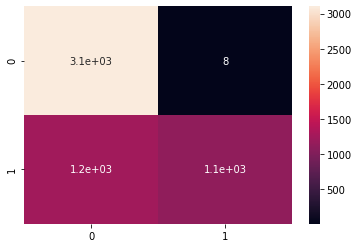

In [32]:
# plotting Confusion Matrix
sns.heatmap(cm1, annot=True)

### Count Vectorized

In [33]:
# Applying naive bayes , fitting the model
print("2. Count Vectorized")
nb = MultinomialNB() 
nb.fit(count_train, Y_train)                       

# prediction on test data
pred1 = nb.predict(count_test)
# accuracy score on test data                    
score = metrics.accuracy_score(Y_test, pred1)
print('-'*30)
print("Accuracy: " + str(score))

# confusion matrix
cm2 = metrics.confusion_matrix(Y_test, pred1)
print("Confusion Matrix: ")
print(cm2)

2. Count Vectorized
------------------------------
Accuracy: 0.9032081662413416
Confusion Matrix: 
[[2977  134]
 [ 397 1978]]


In [34]:
print('Wrong predictions out of total: ',end="")
print((Y_test !=pred1).sum(),'/',((Y_test == pred1).sum()+(Y_test != pred1).sum()))
print('Percentage accuracy: '+str(100*score)+" %")

Wrong predictions out of total: 531 / 5486
Percentage accuracy: 90.32081662413415 %


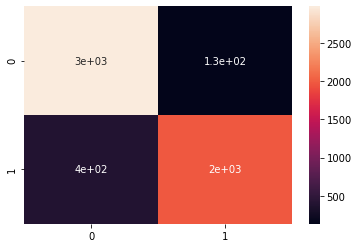

In [35]:
# plotting Confusion Matrix
sns.heatmap(cm2, annot=True)

## 2. Random Forest Model

Random Forest is a robust machine learning algorithm that can be used for both regression and classification task. When come to regression we use a random forest regressor and we can use random forest on classification model as our classification uses.

### TF-Idf Vectorized

In [36]:
#------------------------------------Random Forest Model-------------------------------------------#
# importing RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [37]:
# Apllying Random Forest Classifier

# Random Forest is a robust machine learning algorithm that can be used for both regression and classification task.
# When come to regression we use a random forest regressor and we can use random forest on classification model as our classification uses.
print('#'+'-'*40+"Random Forest Model"+'-'*40+"#")
print("1. TF-Idf Vectorized")
print('-'*30)
RF=RandomForestClassifier().fit(tfidf_train,Y_train)

# prediction on train data 
train_preds2 = RF.predict(tfidf_train)
# accuracy on train data
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds2))

#predict on test
test_preds2 = RF.predict(tfidf_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds2))
print('-'*30)



#Confusion matrix
print("Confusion_matrix train is: ")
print(metrics.confusion_matrix(Y_train, train_preds2))
print("Confusion_matrix test is: ")
print(metrics.confusion_matrix(Y_test, test_preds2))
print('-'*30)

# Wrong Predictions made.
print('Wrong predictions out of total: ',end="")
print((Y_test !=test_preds2).sum(),'/',((Y_test == test_preds2).sum()+(Y_test != test_preds2).sum()))
print('-'*30)

#----------------------------------------Random Forest Model----------------------------------------#
1. TF-Idf Vectorized
------------------------------
Model accuracy on train is:  0.9999218688960075
Model accuracy on test is:  0.907036091870215
------------------------------
Confusion_matrix train is: 
[[7249    1]
 [   0 5549]]
Confusion_matrix test is: 
[[3046   65]
 [ 445 1930]]
------------------------------
Wrong predictions out of total: 510 / 5486
------------------------------


### Count Vectorized

In [38]:
# Apllying RainForest Classifier
print("2. Count Vectorized")
print('-'*30)
RF=RandomForestClassifier().fit(count_train,Y_train)

# prediction on train data
train_preds3 = RF.predict(count_train)
# accuracy on train data
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds3))

# prediction on test data
test_preds3 = RF.predict(count_test)
# accuracy on test data
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds3))
print('-'*30)


#Confusion matrix
print("Confusion_matrix train is: ")
print(metrics.confusion_matrix(Y_train, train_preds3))
print("Confusion_matrix test is: ")
print(metrics.confusion_matrix(Y_test, test_preds3))
print('-'*30)

# Wrong Predictions made.
print('Wrong predictions out of total: ',end="")
print((Y_test !=test_preds3).sum(),'/',((Y_test == test_preds3).sum()+(Y_test != test_preds3).sum()))
print('-'*30)

2. Count Vectorized
------------------------------
Model accuracy on train is:  0.9999218688960075
Model accuracy on test is:  0.9037550127597521
------------------------------
Confusion_matrix train is: 
[[7249    1]
 [   0 5549]]
Confusion_matrix test is: 
[[3040   71]
 [ 457 1918]]
------------------------------
Wrong predictions out of total: 528 / 5486
------------------------------


##3.  K-NN

### TF-Idf Vectorized

In [39]:
#------------------------------------K-Nearest Neighbour-------------------------------------------#
# importing KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

In [40]:
print('#'+'-'*40+"K-Nearest Neighbour"+'-'*40+"#")
print("1. Tf-idf Vectorized")
print('-'*30)

# fit the model on train data 
KNN = KNeighborsClassifier().fit(tfidf_train,Y_train)

#predict on train 
train_preds4 = KNN.predict(tfidf_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds4))

#predict on test
test_preds4 = KNN.predict(tfidf_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds4))
print('-'*30)

#Confusion matrix
print("Confusion_matrix train is: ")
print(metrics.confusion_matrix(Y_train, train_preds4))
print("Confusion_matrix test is: ")
print(metrics.confusion_matrix(Y_test, test_preds4))
print('-'*30)

# Wrong Predictions made.
print('Wrong predictions out of total: ',end="")
print((Y_test !=test_preds4).sum(),'/',((Y_test == test_preds4).sum()+(Y_test != test_preds4).sum()))
print('-'*30)

#----------------------------------------K-Nearest Neighbour----------------------------------------#
1. Tf-idf Vectorized
------------------------------
Model accuracy on train is:  0.5187123994062036
Model accuracy on test is:  0.48651111921254103
------------------------------
Confusion_matrix train is: 
[[1106 6144]
 [  16 5533]]
Confusion_matrix test is: 
[[ 304 2807]
 [  10 2365]]
------------------------------
Wrong predictions out of total: 2817 / 5486
------------------------------


### Count Vectorizer

In [41]:
print("1. Count Vectorized")
print('-'*30)
#fit the model on train data 
KNN = KNeighborsClassifier().fit(count_train,Y_train)

#predict on train 
train_preds5 = KNN.predict(count_train)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train, train_preds5))

#predict on test
test_preds5 = KNN.predict(count_test)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test, test_preds5))
print('-'*30)

#Confusion matrix
print("Confusion_matrix train is: ")
print(metrics.confusion_matrix(Y_train, train_preds5))
print("Confusion_matrix test is: ")
print(metrics.confusion_matrix(Y_test, test_preds5))
print('-'*30)

# Wrong Predictions made.
print('Wrong predictions out of total: ',end="")
print((Y_test !=test_preds5).sum(),'/',((Y_test == test_preds5).sum()+(Y_test != test_preds5).sum()))
print('-'*30)

1. Count Vectorized
------------------------------
Model accuracy on train is:  0.7850613329166342
Model accuracy on test is:  0.7320452059788553
------------------------------
Confusion_matrix train is: 
[[4680 2570]
 [ 181 5368]]
Confusion_matrix test is: 
[[1770 1341]
 [ 129 2246]]
------------------------------
Wrong predictions out of total: 1470 / 5486
------------------------------


**Result**<br>
We have cretaed three models
- Naive Based Model
- Random Forest Model
- K-Nearest Neighbour

We can see that the accuracy is high in Random Forest Model with aproximately 90% accuracy both for Tfidf vectorizer and count vectorizer. Hence, Random Forest Model is best fit for the Fake News Classifier.